In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from datetime import datetime
import pandas_datareader.data as web

In [3]:
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [4]:
year = datetime.today().year
month = datetime.today().month
day = datetime.today().day
end = "%s-%s-%s" %(year-1,month,day)
start = "%s-%s-%s" %(year-2,month,day)

In [5]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'quandl', start, end, access_key="2R89GBx5133ux-s5Gmad")

<h1> Basic Analysis of Apple Stock </h1>

In [17]:
AAPL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,MA for 20 days,MA for 30 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,,,,,,
2018-03-16,178.65,179.12,177.6200,178.02,36836456.0,0.0,1.0,178.65,179.12,177.6200,178.02,36836456.0,NaN,NaN,NaN,NaN
2018-03-15,178.50,180.24,178.0701,178.65,22584565.0,0.0,1.0,178.50,180.24,178.0701,178.65,22584565.0,NaN,NaN,NaN,0.003539
2018-03-14,180.32,180.52,177.8100,178.44,29075469.0,0.0,1.0,180.32,180.52,177.8100,178.44,29075469.0,NaN,NaN,NaN,-0.001175
2018-03-13,182.59,183.50,179.2400,179.97,31168404.0,0.0,1.0,182.59,183.50,179.2400,179.97,31168404.0,NaN,NaN,NaN,0.008574
2018-03-12,180.29,182.39,180.2100,181.72,32055405.0,0.0,1.0,180.29,182.39,180.2100,181.72,32055405.0,NaN,NaN,NaN,0.009724


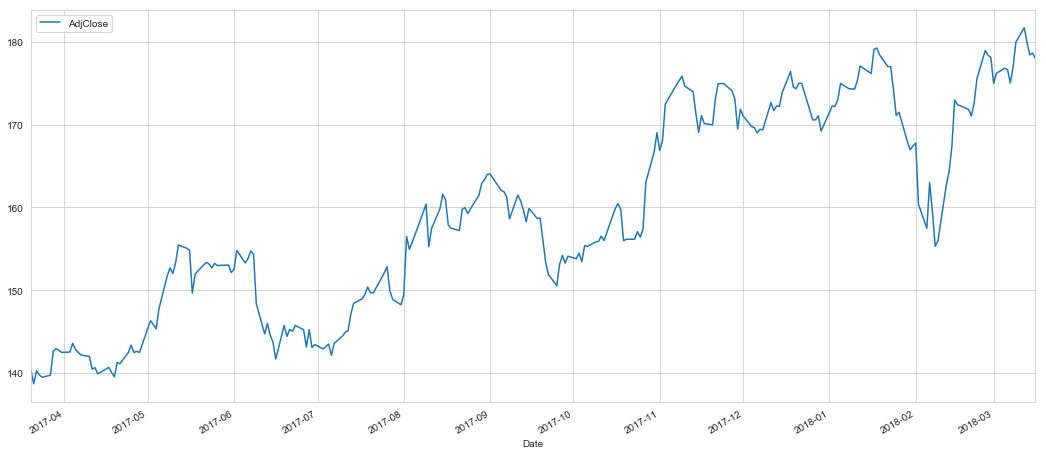

In [7]:
AAPL['AdjClose'].plot(legend=True, figsize=(18,8))

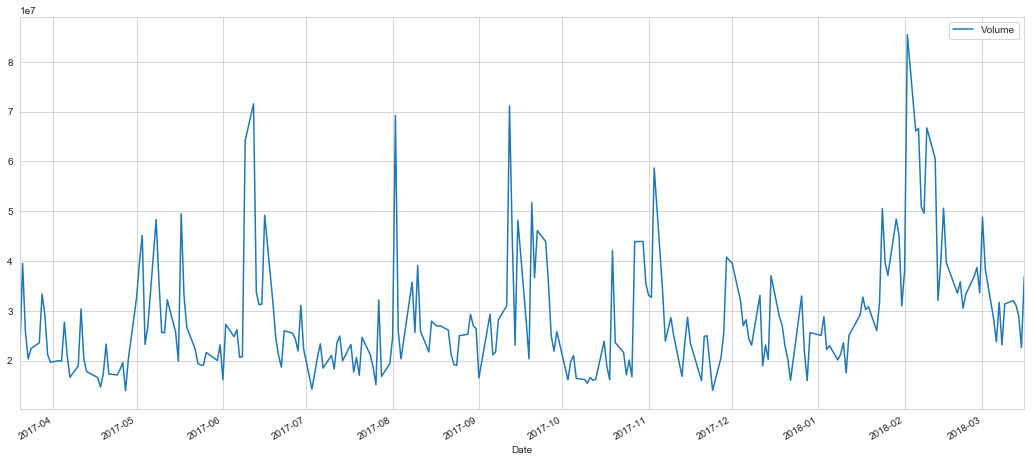

In [8]:
AAPL['Volume'].plot(legend=True, figsize=(18,8))

In [9]:
# MA stands for moving average
MA_day = [20,30,50]
for MA in MA_day:
    column_name = "MA for %s days" %(str(MA))
    AAPL[column_name] = AAPL['AdjClose'].rolling(MA).mean()

AAPL[['AdjClose', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(legend=True, figsize=(18,8))

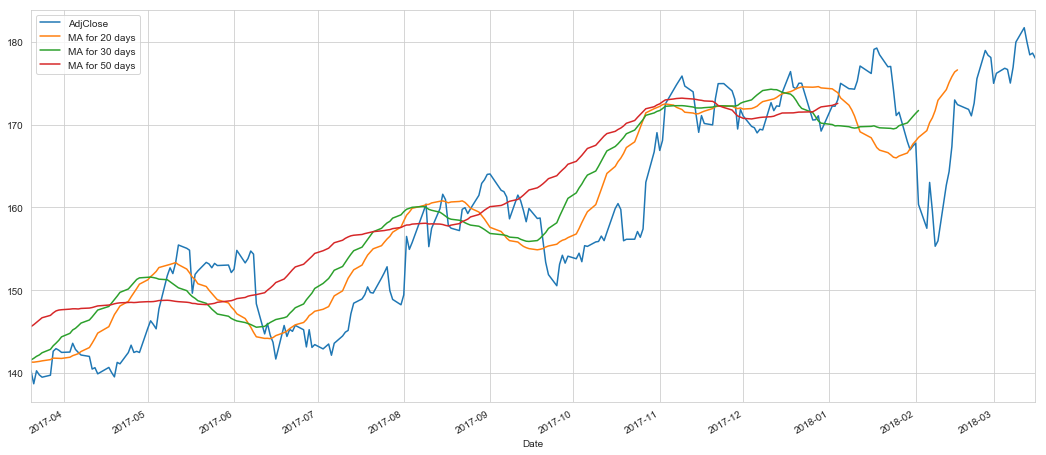

In [11]:
AAPL['Daily Return'] = AAPL['AdjClose'].pct_change()
AAPL['Daily Return'].plot(legend=True, figsize=(18,8), marker='o')

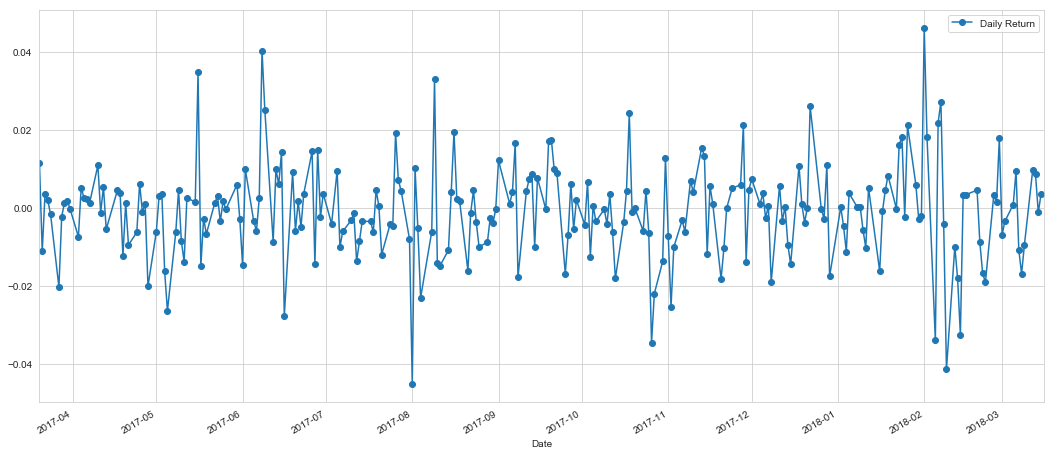

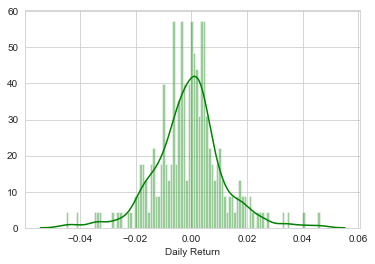

In [13]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='green')

In [14]:
closing_df = pd.DataFrame(list([AAPL['AdjClose'],GOOGL['AdjClose'],MSFT['AdjClose'],AMZN['AdjClose']])).T
closing_df.columns = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']